<a href="https://colab.research.google.com/github/chocky18/365daysChallenge_python/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
cd /content/drive/MyDrive/deeplearning_Practice/imageclassification

/content/drive/MyDrive/deeplearning_Practice/imageclassification


In [1]:
import tensorflow as tf

In [2]:
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices("GPU")

In [4]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import cv2

In [6]:
import imghdr

In [12]:
for image_class in os.listdir(data_dir):
  print(image_class)

happy
sad


In [10]:
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data/happy/vector4.svg
Image not in ext list data/happy/vector9.svg
Image not in ext list data/happy/vector11.svg
Image not in ext list data/happy/vector.svg
Image not in ext list data/happy/vector5.svg
Image not in ext list data/happy/vector7.svg
Image not in ext list data/happy/vector10.svg
Image not in ext list data/happy/vector3.svg
Image not in ext list data/happy/vector6.svg
Image not in ext list data/happy/vector2.svg
Image not in ext list data/happy/vector8.svg
Image not in ext list data/happy/portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image not in ext list data/happy/depositphotos_317939792-stock-photo-young-woman-isolated-yellow-background.jpg
Image not in ext list data/happy/young-woman-curly-hair-laughing-260nw-1687578475.jpg
Image not in ext list data/happy/depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in ext list da

Found 280 files belonging to 2 classes.


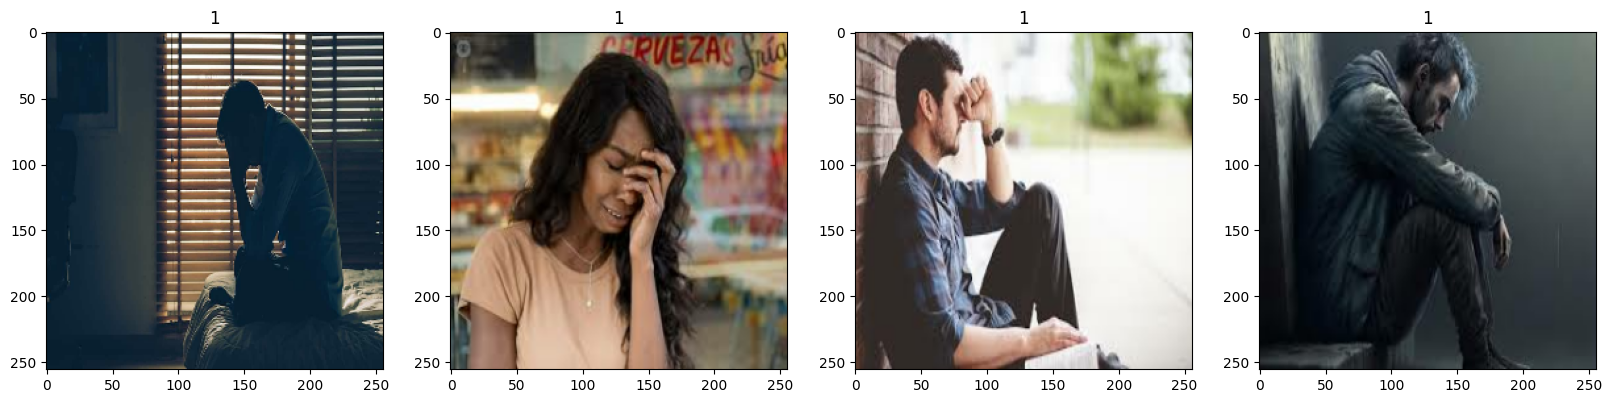

In [18]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
batch

(array([[[[ 69.       ,  61.       ,  50.       ],
          [ 63.17578  ,  55.17578  ,  44.17578  ],
          [ 63.95117  ,  55.95117  ,  44.95117  ],
          ...,
          [193.95117  , 159.85352  ,  73.29297  ],
          [193.08789  , 157.       ,  79.0293   ],
          [196.       , 157.       ,  80.       ]],
 
         [[ 49.345703 ,  40.66797  ,  31.023438 ],
          [ 52.73179  ,  46.02769  ,  34.409523 ],
          [ 60.231575 ,  51.65312  ,  41.90931  ],
          ...,
          [198.72841  , 163.98611  ,  80.71495  ],
          [198.52962  , 162.46158  ,  85.84635  ],
          [202.09961  , 163.77734  ,  88.13281  ]],
 
         [[ 41.851562 ,  33.777344 ,  25.240234 ],
          [ 49.16786  ,  44.00575  ,  32.55653  ],
          [ 57.20983  ,  49.282097 ,  40.598503 ],
          ...,
          [200.51451  , 166.32365  ,  86.0505   ],
          [200.20497  , 163.69705  ,  90.02724  ],
          [204.53711  , 166.53711  ,  93.38867  ]],
 
         ...,
 
         [[ 

In [16]:
batch[0]

array([[[[ 69.       ,  61.       ,  50.       ],
         [ 63.17578  ,  55.17578  ,  44.17578  ],
         [ 63.95117  ,  55.95117  ,  44.95117  ],
         ...,
         [193.95117  , 159.85352  ,  73.29297  ],
         [193.08789  , 157.       ,  79.0293   ],
         [196.       , 157.       ,  80.       ]],

        [[ 49.345703 ,  40.66797  ,  31.023438 ],
         [ 52.73179  ,  46.02769  ,  34.409523 ],
         [ 60.231575 ,  51.65312  ,  41.90931  ],
         ...,
         [198.72841  , 163.98611  ,  80.71495  ],
         [198.52962  , 162.46158  ,  85.84635  ],
         [202.09961  , 163.77734  ,  88.13281  ]],

        [[ 41.851562 ,  33.777344 ,  25.240234 ],
         [ 49.16786  ,  44.00575  ,  32.55653  ],
         [ 57.20983  ,  49.282097 ,  40.598503 ],
         ...,
         [200.51451  , 166.32365  ,  86.0505   ],
         [200.20497  , 163.69705  ,  90.02724  ],
         [204.53711  , 166.53711  ,  93.38867  ]],

        ...,

        [[ 60.       ,  74.       ,  7

In [17]:
batch[1]

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

In [19]:
batch[0].min()

0.0

In [20]:
batch[0].max()

255.0

In [21]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.08235294, 0.3019608 , 0.10980392],
          [0.09411765, 0.30588236, 0.11372549],
          [0.09019608, 0.29411766, 0.10588235],
          ...,
          [0.07843138, 0.29803923, 0.11372549],
          [0.07843138, 0.29803923, 0.11372549],
          [0.07450981, 0.29411766, 0.10980392]],
 
         [[0.08235294, 0.3019608 , 0.10980392],
          [0.09411765, 0.30588236, 0.11372549],
          [0.09019608, 0.29411766, 0.10588235],
          ...,
          [0.07843138, 0.29803923, 0.11372549],
          [0.07843138, 0.29803923, 0.11372549],
          [0.07450981, 0.29411766, 0.10980392]],
 
         [[0.08235294, 0.3019608 , 0.10980392],
          [0.09411765, 0.30588236, 0.11372549],
          [0.09019608, 0.29411766, 0.10588235],
          ...,
          [0.08235294, 0.3019608 , 0.11764706],
          [0.07843138, 0.29803923, 0.11372549],
          [0.07450981, 0.29411766, 0.10980392]],
 
         ...,
 
         [[0.09411765, 0.3019608 , 0.12156863],
          [0.08627

In [25]:
data.as_numpy_iterator().next()[0].min()

0.0

In [26]:
data.as_numpy_iterator().next()[0].max()

1.0

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)



In [28]:
train_size


6

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [30]:
#Build Deep Learning Model

train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [32]:
#Train

logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 15s 1s/step - loss: 1.1152 - accuracy: 0.5573 - val_loss: 0.6859 - val_accuracy: 0.4375
Epoch 2/20
6/6 [==============================] - 9s 1s/step - loss: 0.6460 - accuracy: 0.6615 - val_loss: 0.5845 - val_accuracy: 0.8438
Epoch 3/20
6/6 [==============================] - 5s 568ms/step - loss: 0.5887 - accuracy: 0.7396 - val_loss: 0.5105 - val_accuracy: 0.7500
Epoch 4/20
6/6 [==============================] - 9s 1s/step - loss: 0.4781 - accuracy: 0.8125 - val_loss: 0.5138 - val_accuracy: 0.6875
Epoch 5/20
6/6 [==============================] - 4s 468ms/step - loss: 0.3987 - accuracy: 0.8229 - val_loss: 0.2444 - val_accuracy: 0.9375
Epoch 6/20
6/6 [==============================] - 8s 1s/step - loss: 0.2960 - accuracy: 0.8906 - val_loss: 0.3907 - val_accuracy: 0.7812
Epoch 7/20
6/6 [==============================] - 5s 561ms/step - loss: 0.2223 - accuracy: 0.9115 - val_loss: 0.1893 - val_accuracy: 0.9688
Epoch 8/20
6/6 [===============

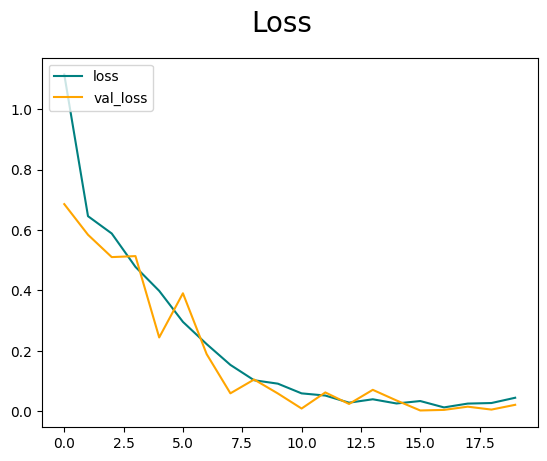

In [33]:
#Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

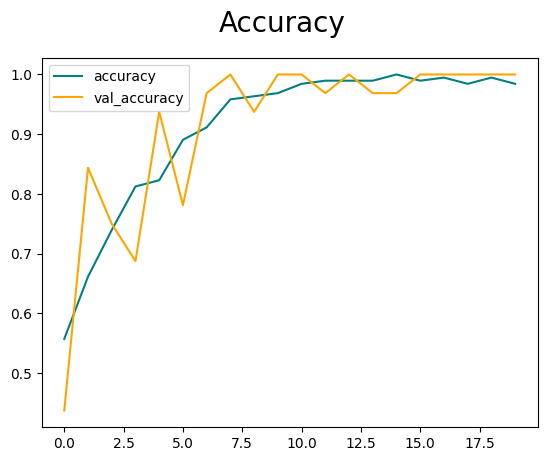

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
# Evaluate

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


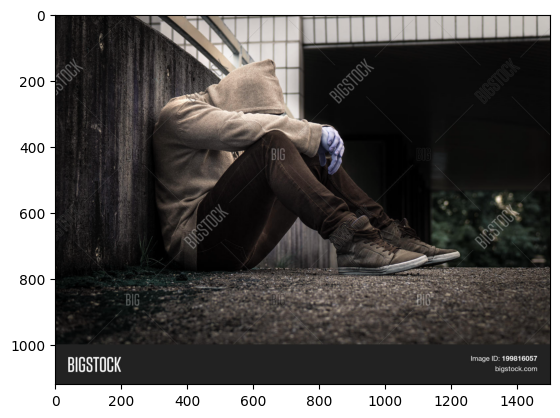

In [45]:
#Test

import cv2
img = cv2.imread('/content/drive/MyDrive/deeplearning_Practice/imageclassification/data/sad/199816057.jpg')
plt.imshow(img)
plt.show()

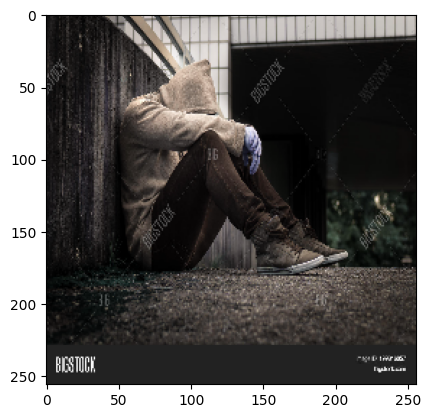

In [47]:
test_img = tf.image.resize(img, (256,256))
plt.imshow(test_img.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(test_img/255, 0))

1/1 [==============================] - 0s 26ms/step


In [49]:
yhat

array([[0.99401784]], dtype=float32)

In [50]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [43]:
#Save the Model

from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))


In [51]:
new_model = load_model('/content/drive/MyDrive/deeplearning_Practice/imageclassification/models/imageclassifier.h5')
new_model.predict(np.expand_dims(test_img/255, 0))

1/1 [==============================] - 0s 74ms/step


array([[0.99401784]], dtype=float32)